# Insights from the Data Engineer 2021 Survey

Welcome! <br>
This notebook contains all codes, figures, statistics related to the data analysis.

# Table of Content

- Business Understanding
- Data Understanding
- Data preparation 
- Question I
- Question II
- Question III
- Results 

# Business Understanding

I'm interested in understanding reasons behind burnout for a particular group (Data Engineers), and in order to do so, we will go over many steps to answer 3 main questions that would clarify why such group suffers from burnout and work stress. <br>
The 3 questions are: 
-  What are the tasks that make them feel burned out?
-  Do bigger companies make them more anxious?
-  What other factors influence burning-out?

To answer these questions we need accurate and real data that reflects this group opinions and problems.
We will be using the 2021 Data Engineer Survey to aquire answers for the raised questions but first we need to fully understand the data that we have.



# Data Understanding

There are two datasets, one for the survey questions and the other contains the full results. <br> Now, Let's take a look at the datasets

In [ ]:
#importing all the libraries that we will need later on
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('2021-data-engineer-survey-results.csv')
schema = pd.read_csv('2021-data-engineer-survey-questions.csv', encoding="cp1252")
df.head()

,GENDER,AGE,EMPLOYMENT,STATE,REGION,EDUCATION,QA_M1,QA_M2,QA_M3,QA_M4,...,Q14_M3,Q14_M4,Q14_M5,Q15,QE,QF,QG,QH,QI,QJ
0,Male,39,\tWork full-time,Wisconsin,Midwest,\tGraduate or post-graduate work,Maintain the distributed systems that execute ...,"Develop, maintain, and optimize data systems t...",Ensure that the data architecture will scale a...,Write and test code,...,NaN,NaN,NaN,Agree somewhat,10,10,11,1500,$50 Million to under $100 Million,Information technology (IT) / software
1,Male,39,\tWork full-time,Florida,South,\tBachelor’s degree,"Develop, maintain, and optimize data systems t...",Maintain the distributed systems that execute ...,Write and test code,Manage continuous integration and continuous d...,...,Lack of knowledge around what DataOps is,NaN,NaN,Agree somewhat,5,10,50,2000,$10 Million to under $25 Million,Banking
2,Male,34,\tWork full-time,Florida,South,\tGraduate or post-graduate work,Create data pipelines,"Develop, maintain, and optimize data systems t...",Write tests to ensure that bad data is detecte...,Maintain the distributed systems that execute ...,...,NaN,NaN,NaN,Agree strongly,10,15,20,20,$1 Billion or more,Information technology (IT) / software
3,Male,38,\tWork full-time,Wisconsin,Midwest,\tGraduate or post-graduate work,Maintain the distributed systems that execute ...,Maintain data in ready-to-use formats,Manage continuous integration and continuous d...,NaN,...,NaN,NaN,NaN,Agree strongly,18,18,45,250,$100 Million to under $250 Million,Information technology (IT) / software
4,Male,39,\tWork full-time,Georgia,South,\tGraduate or post-graduate work,Manage continuous integration and continuous d...,Maintain the distributed systems that execute ...,Maintain data in ready-to-use formats,"Develop, maintain, and optimize data systems t...",...,NaN,NaN,NaN,Agree somewhat,6,7,10,999,$250 Million to under $500 Million,Banking


In [ ]:
df.columns

Index(['GENDER', 'AGE', 'EMPLOYMENT', 'STATE', 'REGION', 'EDUCATION', 'QA_M1',
       'QA_M2', 'QA_M3', 'QA_M4', 'QA_M5', 'QA_M6', 'QA_M7', 'QA_M8', 'QB',
       'QC', 'QD', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5_M1', 'Q5_M2', 'Q5_M3', 'Q5_M4',
       'Q5_M5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14_M1',
       'Q14_M2', 'Q14_M3', 'Q14_M4', 'Q14_M5', 'Q15', 'QE', 'QF', 'QG', 'QH',
       'QI', 'QJ'],
      dtype='object')

In [ ]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 600
Number of columns: 46


The dataset has 600 responses with 46 feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GENDER      600 non-null    object
 1   AGE         600 non-null    int64 
 2   EMPLOYMENT  600 non-null    object
 3   STATE       600 non-null    object
 4   REGION      600 non-null    object
 5   EDUCATION   600 non-null    object
 6   QA_M1       600 non-null    object
 7   QA_M2       600 non-null    object
 8   QA_M3       600 non-null    object
 9   QA_M4       549 non-null    object
 10  QA_M5       400 non-null    object
 11  QA_M6       168 non-null    object
 12  QA_M7       34 non-null     object
 13  QA_M8       7 non-null      object
 14  QB          600 non-null    object
 15  QC          600 non-null    object
 16  QD          600 non-null    object
 17  Q1          600 non-null    object
 18  Q2          600 non-null    object
 19  Q3          600 non-null    int64 
 20  Q4        

The dataset has both numerical and categorical data. 

Next, let's explore the questions dataset

In [ ]:
schema['Question Text'][:5]

0                          What is your gender please?
1                                    What is your age?
2                     What is your employment status? 
3                 What state do you work in currently?
4    What is the highest level of formal education ...
Name: Question Text, dtype: object

To make it easier to retrive the questions, I'm going to create a function that returns the original question.

In [ ]:
#using this helpful function that we applied in the excercise 
def get_question(col, schema=schema):
  """
    This function returns the full question of the original dataset
  
    Parameters:
    col (String): the column name in String format
    
    Returns:
    String: full question in string format
  """
  quest = list(schema[schema['Metric Label'] == col]['Question Text'])[0]
    
  return quest

    

get_question('Q3')
#Note: this will work for all columns except the questions that are represented in multiple-column scheme

'What percent of the time do you receive requests in your job that are simply not possible to do in the time requested? Please give your answer as a percent. Your best guess is fine.'

# Data preparation

To answer each question, the data will be prepared and cleaned based on the goal for each part.

## Q1: What are the tasks that makes them feel burnout? 

Part I: Examining thier daily tasks

In [ ]:
df['QA_M1'].value_counts() 

Develop, maintain, and optimize data systems to make data available for analysis                 92
Maintain data in ready-to-use formats                                                            77
Ensure that the data architecture will scale appropriately                                       72
Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products    71
Maintain the distributed systems that execute data pipelines                                     69
Write tests to ensure that bad data is detected and acted upon in production                     64
Write and test code                                                                              61
Create data pipelines                                                                            51
Put analytics into production                                                                    43
Name: QA_M1, dtype: int64

In [ ]:
counts = dict(df['QA_M1'].value_counts())
counts

{'Develop, maintain, and optimize data systems to make data available for analysis': 92,
 'Maintain data in ready-to-use formats': 77,
 'Ensure that the data architecture will scale appropriately': 72,
 'Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products': 71,
 'Maintain the distributed systems that execute data pipelines': 69,
 'Write tests to ensure that bad data is detected and acted upon in production': 64,
 'Write and test code': 61,
 'Create data pipelines': 51,
 'Put analytics into production': 43}

In [ ]:
def add_dict(dict2 , counts=counts):
  """
    This function returns an updated dictionary of values count
  
    Parameters:
    dict2 (dict): dictionary that has the count of values
    
    Returns:
    dict: new updated dictionary 
  """
  updated_counts = 0
  for i in counts:
    if i in dict2:
        counts[i] = counts[i] + dict2[i]
    else:
        pass
  updated_counts = counts   
  return updated_counts

In [ ]:
questions = ['QA_M2','QA_M3', 'QA_M4','QA_M5','QA_M6','QA_M7','QA_M8']
for i in questions:
 total_count = add_dict(dict(df[i].value_counts()))

total_count

{'Develop, maintain, and optimize data systems to make data available for analysis': 397,
 'Maintain data in ready-to-use formats': 350,
 'Ensure that the data architecture will scale appropriately': 317,
 'Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products': 361,
 'Maintain the distributed systems that execute data pipelines': 348,
 'Write tests to ensure that bad data is detected and acted upon in production': 346,
 'Write and test code': 315,
 'Create data pipelines': 263,
 'Put analytics into production': 261}

In [ ]:
result = pd.Series(total_count)

In [ ]:
result = result.sort_values(ascending= False)

In [ ]:
result.rename(index={'Develop, maintain, and optimize data systems to make data available for analysis'
                     :'Develop, maintain, and optimize data systems',
                     'Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products'
                     :'Continuous delivery/deployment (CI/CD) of new data products',
                     'Write tests to ensure that bad data is detected and acted upon in production'
                    :'Write tests to detect and handle bad data before production'}, inplace=True)

In [ ]:
result.index[0] 

'Develop, maintain, and optimize data systems'

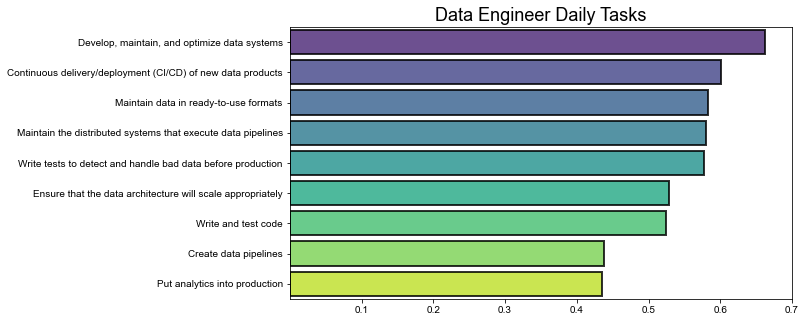

In [ ]:
plt.figure(figsize = (9,5))


count = sns.barplot(x = result.values / df.shape[0]  , y = result.index, 
                    alpha = 0.8, saturation = 1  , edgecolor = 'k',
                    linewidth = 2, palette = 'viridis')
#count.set_yticklabels('')
    
#plt.legend(title='Tasks', loc='upper left', labels=result.index)
#sns.move_legend(count, "upper left", bbox_to_anchor=(1,1))
sns.set(font_scale=1.5)
plt.xticks(ticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7])
plt.title('Data Engineer Daily Tasks', fontsize = 18, fontweight = 'light', loc = 'center')
plt.savefig('daily_tasks.png', dpi=1200, format='png', bbox_inches='tight')
plt.show()

In [ ]:
cols =  ['QA_M2','QA_M3', 'QA_M4','QA_M5','QA_M6','QA_M7','QA_M8']
for i in cols:
    df2 = df2.join(df[i],lsuffix = '_left', rsuffix = '_right')

In [ ]:
counts = dict(df['Q5_M1'].value_counts())
counts

{'Focusing too much time on finding and fixing errors': 106,
 'Constantly playing catch up with stakeholder requests': 104,
 'Lack of feedback on the products delivered': 104,
 'Focusing too much on maintaining data pipelines and/or manual processes': 102,
 'Fast pace of requests from stakeholders': 90,
 'Unreasonable requests from stakeholders': 77,
 'I have never felt burnt out from my job': 17}

In [ ]:
questions = ['Q5_M2','Q5_M3', 'Q5_M4','Q5_M5']
for i in questions:
 total_count = add_dict(dict(df[i].value_counts()))

total_count

{'Focusing too much time on finding and fixing errors': 301,
 'Constantly playing catch up with stakeholder requests': 296,
 'Lack of feedback on the products delivered': 282,
 'Focusing too much on maintaining data pipelines and/or manual processes': 297,
 'Fast pace of requests from stakeholders': 286,
 'Unreasonable requests from stakeholders': 251,
 'I have never felt burnt out from my job': 17}

In [ ]:
result2 = pd.Series(total_count)
result2 = result2.sort_values(ascending= False)

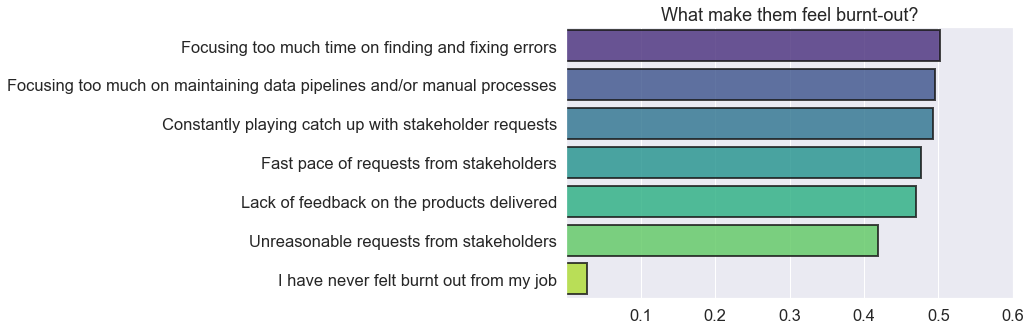

In [ ]:
plt.figure(figsize = (8,5))


count = sns.barplot(x = result2.values / df.shape[0]  , y = result2.index, 
                    alpha = 0.8, saturation = 1  , edgecolor = 'k',
                    linewidth = 2, palette = 'viridis')

sns.set(font_scale=1.5)
plt.xticks(ticks=[0.1,0.2,0.3,0.4,0.5,0.6])
plt.title('What make them feel burnt-out?', fontsize = 18, fontweight = 'light')
plt.savefig('burnt-out.png', dpi=1200, format='png', bbox_inches='tight')
plt.show()

In [ ]:
result2

Focusing too much time on finding and fixing errors                        301
Focusing too much on maintaining data pipelines and/or manual processes    297
Constantly playing catch up with stakeholder requests                      296
Fast pace of requests from stakeholders                                    286
Lack of feedback on the products delivered                                 282
Unreasonable requests from stakeholders                                    251
I have never felt burnt out from my job                                     17
dtype: int64

Precent of people who has never felt burning out

In [ ]:
17 / 600 * 100

2.833333333333333

## Q2: Do bigger companies make them more anxious? 

In [ ]:
copy = df
copy['QH'][:3]

0    1500
1    2000
2      20
Name: QH, dtype: int64

In [ ]:
copy['QH'].min()

5

In [ ]:
copy['QH'].max()

273000

The range is between 5 to 273000

Suggested range

| Employees No. | Range Label | 
| :-- | :--- |
| 0 - 10 | Very small company |
| 11 - 49 | Small company |
| 50 - 299 | Mid-size company |
| 300 - 4999 | Big Company |
| 5000 - 9999 | Very big company |
| 10000 or more | International company |


In [ ]:
copy['QH'] = copy['QH'].astype(np.int64)

In [ ]:
criteria = [copy['QH'].between(0, 10), copy['QH'].between(11, 49),
            copy['QH'].between(50, 299), copy['QH'].between(300, 4999),
            copy['QH'].between(5000, 9999), copy['QH'].between(10000, 273000)]
Range_label = ['Very small company', 'Small company', 'Mid-size company', 'Big Company','Very big company','International company']

copy['QH'] = np.select(criteria, Range_label, 0)

In [ ]:
copy['QH'].value_counts()

Big Company              429
Mid-size company          57
Very big company          54
International company     40
Small company             15
Very small company         5
Name: QH, dtype: int64

In [ ]:
get_question('Q6')

'How strongly do you agree or disagree with the following statement?- I wish my job came with a therapist to help me manage the stress from my job.      '

In [ ]:
copy['Q6'].value_counts()

Agree somewhat       269
Agree strongly       200
Disagree somewhat    100
Disagree strongly     31
Name: Q6, dtype: int64

In [ ]:
copy['Q6'] = copy['Q6'].map({'Agree strongly':4, 'Agree somewhat':3, 'Disagree somewhat':2, 'Disagree strongly':1}) 

In [ ]:
copy['Q6'][:10]

0    3
1    4
2    4
3    4
4    3
5    1
6    4
7    3
8    4
9    4
Name: Q6, dtype: int64

In [ ]:
copy.groupby(['QH']).mean()['Q6'].sort_values().dropna()

QH
Small company            2.733333
Mid-size company         2.964912
Big Company              3.055944
International company    3.125000
Very big company         3.203704
Very small company       3.800000
Name: Q6, dtype: float64

In [ ]:
df['QD'].value_counts()

We have partially implemented DataOps into our company’s data processes          243
We have mostly or fully implemented DataOps into our company’s data processes    239
We have not implemented DataOps into our processes, but have plans to            111
We have not implemented DataOps into our processes, and have no plans to           7
Name: QD, dtype: int64

In [ ]:
df.describe()

,AGE,Q3,Q4,Q6
count,600.000000,600.000000,600.000000,600.000000
mean,42.405000,32.466667,27.690000,3.063333
std,8.769406,18.496913,19.312747,0.838945
min,21.000000,1.000000,0.000000,1.000000
25%,36.000000,20.000000,14.750000,3.000000
50%,41.000000,30.000000,20.000000,3.000000
75%,50.000000,40.000000,40.000000,4.000000
max,66.000000,100.000000,100.000000,4.000000


In [ ]:
df.describe(include=['object'])

,GENDER,EMPLOYMENT,STATE,REGION,EDUCATION,QA_M1,QA_M2,QA_M3,QA_M4,QA_M5,...,Q14_M3,Q14_M4,Q14_M5,Q15,QE,QF,QG,QH,QI,QJ
count,600,600,600,600,600,600,600,600,549,400,...,318,111,18,600,600,600,600,600,600,600
unique,3,1,49,4,3,9,9,9,9,9,...,8,8,8,4,39,23,67,6,8,23
top,Male,\tWork full-time,California,South,\tBachelor’s degree,"Develop, maintain, and optimize data systems t...","Develop, maintain, and optimize data systems t...",Maintain the distributed systems that execute ...,Maintain data in ready-to-use formats,Manage continuous integration and continuous d...,...,Lack of the right skills among employees,Organization isn’t sure how to implement this,Scale of incorporating DataOps is too large,Agree somewhat,10,5,20,Big Company,$50 Million to under $100 Million,Information technology (IT) / software
freq,436,600,46,224,334,92,81,81,84,52,...,49,18,4,288,68,93,50,429,116,91


In [ ]:
df['EDUCATION'].value_counts()

\tBachelor’s degree                 334
\tGraduate or post-graduate work    204
\tAssociate degree                   62
Name: EDUCATION, dtype: int64

In [ ]:
copy['EDUCATION'] = copy['EDUCATION'].map(
    {'\tBachelor’s degree':1, 
     '\tGraduate or post-graduate work':2,
     '\tAssociate degree':3}) 

In [ ]:
col_names = list(df.columns.values) 

for i in col_names:
    print(i, df[i].isnull().sum()) 

GENDER 0
AGE 0
EMPLOYMENT 0
STATE 0
REGION 0
EDUCATION 0
QA_M1 0
QA_M2 0
QA_M3 0
QA_M4 51
QA_M5 200
QA_M6 432
QA_M7 566
QA_M8 593
QB 0
QC 0
QD 0
Q1 0
Q2 0
Q3 0
Q4 0
Q5_M1 0
Q5_M2 29
Q5_M3 146
Q5_M4 504
Q5_M5 591
Q6 0
Q7 0
Q8 0
Q9 0
Q10 0
Q11 0
Q12 0
Q13 0
Q14_M1 239
Q14_M2 247
Q14_M3 282
Q14_M4 489
Q14_M5 582
Q15 0
QE 0
QF 0
QG 0
QH 0
QI 0
QJ 0


There is no null values except for the columns that represent multi-answers and it won't be used 

In [ ]:
copy = copy.drop(['QA_M1','QA_M2','QA_M3',
'QA_M4', 'QA_M5', 'QA_M6','QA_M7', 
'QA_M8','Q5_M1','Q5_M2','Q5_M3',
'Q5_M4','Q5_M5','Q14_M1','Q14_M2',
'Q14_M3' ,'Q14_M4' ,'Q14_M5'], axis=1)

In [ ]:
cols = list(copy.columns.values)
#cols.remove('AGE')
for i in cols:
    print(i, copy[i].value_counts()) 

GENDER Male          436
Female        161
Non-Binary      3
Name: GENDER, dtype: int64
AGE 39    33
38    33
43    32
36    31
41    30
40    28
50    27
35    27
44    26
48    23
37    21
56    20
42    17
55    16
34    16
51    15
54    15
45    14
33    14
52    13
53    13
29    13
30    13
49    12
28    11
32    11
47    11
58    11
27     9
46     7
59     6
26     6
31     5
60     4
57     4
24     3
63     2
61     2
21     1
66     1
23     1
25     1
65     1
62     1
Name: AGE, dtype: int64
EMPLOYMENT \tWork full-time     600
Name: EMPLOYMENT, dtype: int64
STATE California              46
Florida                 45
New York                37
Texas                   27
Georgia                 27
Illinois                27
Washington              24
Arizona                 20
Michigan                19
Wisconsin               18
Tennessee               18
North Carolina          18
Louisiana               17
Massachusetts           15
New Jersey              14
Ohio      

In [ ]:
col_names = ['GENDER','EDUCATION','QB','QC','QD','Q1','Q2','Q6','Q7','Q8','Q9','Q10','Q11','QH','QJ']
#specifying the columns we're only concerned about

In [ ]:
for i in col_names:
    print(get_question(i))
    print(copy[i].value_counts()) 

What is your gender please?
Male          436
Female        161
Non-Binary      3
Name: GENDER, dtype: int64
Which of the following describes the department in which you work at your company?
1    334
2    204
3     62
Name: EDUCATION, dtype: int64
Which of the following best describes your current title?
Data Engineer                128
Data Management Lead          91
Big Data Engineer             75
Data & Analytics Lead         66
Solutions Architect           58
Enterprise Architect          50
ETL Developer                 49
Data Architect                47
Enterprise Analytics Lead     33
Other                          3
Name: QB, dtype: int64
Do you currently work in a management-level position?   
No     401
Yes    199
Name: QC, dtype: int64
To what extent, if at all, has your company implemented DataOps into its processes?           
We have partially implemented DataOps into our company’s data processes          243
We have mostly or fully implemented DataOps into our compa

In [ ]:
copy['QC'] = copy['QC'].map(
    {'Yes':'Mang-lvl', 
     'No':'Non-mang'}) 

In [ ]:
copy['Q10'] = copy['Q10'].map(
    {'No, never':'Never', 
     'Yes, multiple times':'Multiple-times',
     'Yes, once':'one-time'}) 

### Encoding nominal variables

In [ ]:
new_df = pd.get_dummies(copy['GENDER'])

In [ ]:
#new_df = new_df.join(pd.get_dummies(copy['QB']),lsuffix = '_left', rsuffix = '_right')
new_df

,Female,Male,Non-Binary
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
595,1,0,0
596,1,0,0
597,1,0,0
598,1,0,0


In [ ]:
nominal = ['QB','QC','Q10','QJ']
for i in nominal:
    new_df = new_df.join(pd.get_dummies(copy[i]),lsuffix = '_left', rsuffix = '_right')

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Female                                       600 non-null    uint8
 1   Male                                         600 non-null    uint8
 2   Non-Binary                                   600 non-null    uint8
 3   Big Data Engineer                            600 non-null    uint8
 4   Data & Analytics Lead                        600 non-null    uint8
 5   Data Architect                               600 non-null    uint8
 6   Data Engineer                                600 non-null    uint8
 7   Data Management Lead                         600 non-null    uint8
 8   ETL Developer                                600 non-null    uint8
 9   Enterprise Analytics Lead                    600 non-null    uint8
 10  Enterprise Architect      

In [ ]:
pd.get_dummies(copy['QB']).head()

,Big Data Engineer,Data & Analytics Lead,Data Architect,Data Engineer,Data Management Lead,ETL Developer,Enterprise Analytics Lead,Enterprise Architect,Other,Solutions Architect
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [ ]:
copy['Q9'].value_counts()

Somewhat likely      263
Very likely          154
Not very likely      133
Not at all likely     50
Name: Q9, dtype: int64

In [ ]:
copy['Q9'] = copy['Q9'].map(
    {'Not at all likely':0, 
     'Not very likely':1,
     'Somewhat likely':2,
     'Very likely':3 }) 

In [ ]:
num_features = ['AGE', 'Q3','Q4','QE','QF','QG']
ordinal = ['EDUCATION','Q6','Q9']

In [ ]:
for i in num_features:
    new_df = new_df.join(copy[i],lsuffix = '_left', rsuffix = '_right')

In [ ]:
for i in ordinal:
    new_df = new_df.join(copy[i],lsuffix = '_left', rsuffix = '_right')

## Q3: What other factors influnce burning-out?


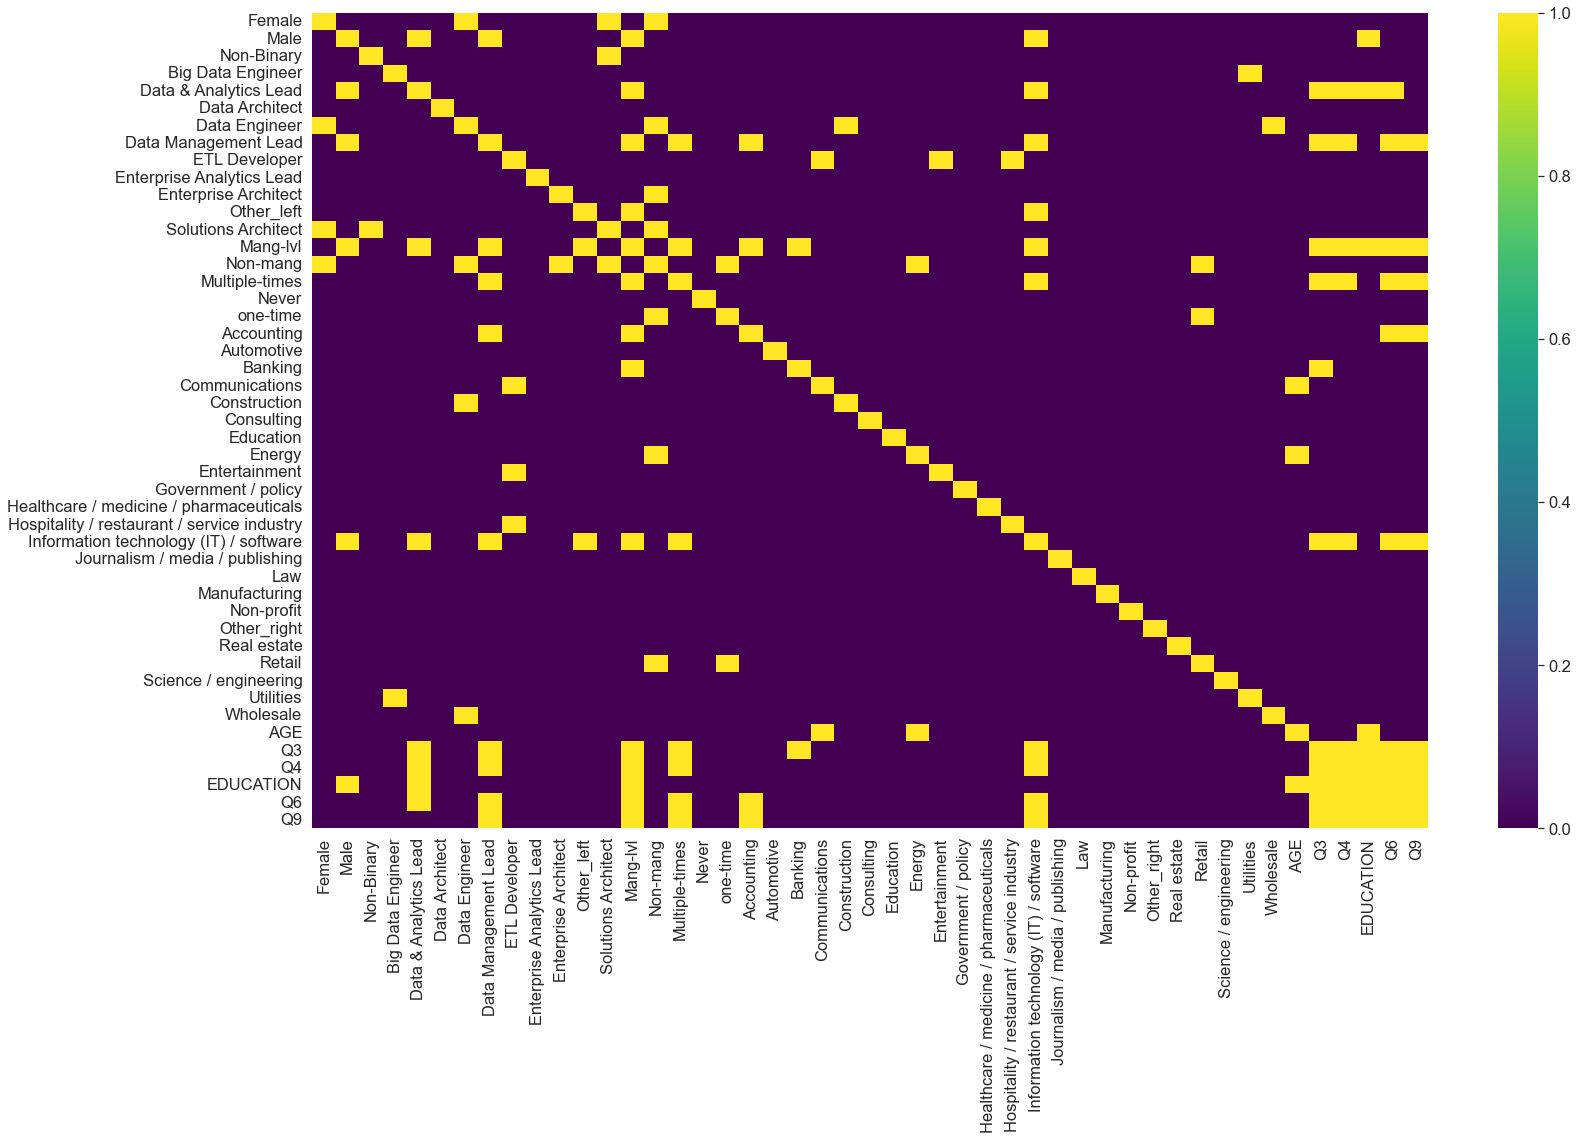

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(new_df.corr() > 0.1, vmin = 0 , vmax = 1.0, cmap = 'viridis')
plt.savefig('co-matrix.png', dpi=800, format='png',bbox_inches='tight')

Insights from the above correlation matrix:
- Those who are in Manegerial roles are mostly burnt-out
- Those who are in Manegerial roles have thoughts about leaving thier jobs multiple times
- Those who works at Accounting and IT industries/sectors are more anxious

In [ ]:
sectors = pd.get_dummies(copy['QJ'])
sectors = sectors.join(copy['Q6'],lsuffix = '_left', rsuffix = '_right')
sectors

,Accounting,Automotive,Banking,Communications,Construction,Consulting,Education,Energy,Entertainment,Government / policy,...,Law,Manufacturing,Non-profit,Other,Real estate,Retail,Science / engineering,Utilities,Wholesale,Q6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
596,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
598,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
copy.groupby(['QJ']).mean()['Q6'].sort_values().dropna()

QJ
Non-profit                                     2.500000
Wholesale                                      2.592593
Real estate                                    2.636364
Energy                                         2.750000
Healthcare / medicine / pharmaceuticals        2.833333
Construction                                   2.838710
Education                                      2.842105
Science / engineering                          2.857143
Communications                                 2.869565
Automotive                                     2.920000
Entertainment                                  2.937500
Utilities                                      3.000000
Law                                            3.000000
Retail                                         3.025000
Manufacturing                                  3.066667
Hospitality / restaurant / service industry    3.076923
Banking                                        3.157895
Consulting                                   

In [ ]:
copy['QF'] = np.where(copy['QF'] == 'Less than one year', 0, copy['QF'])

In [ ]:
copy['QF'] = copy['QF'].astype(np.int64)

In [ ]:
copy['QF'].mean()

6.815

Do year of experince has an influence?

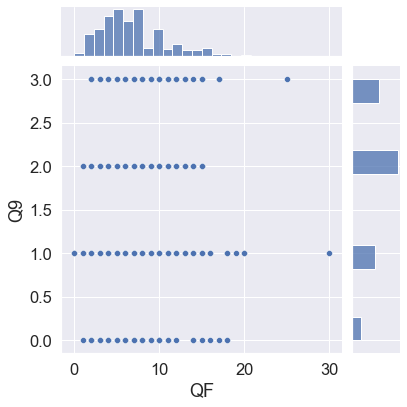

In [ ]:
sns.jointplot(data=copy, x="QF", y="Q9")

The data doesn't tell us much

## Results 


The following insights were drawn from this notebook:
1. Other than managing pipelines and errors, stress is not related to the job itself but is instead related to the stakeholders’ quick and unreasonable requests.
2. Bigger companies that have more than 300 employees do actually make data engineers feel more anxious compared to small and mid-sized companies.
3. Those who are in managerial/leading roles are mostly burned out.
4. Those who are in managerial/leading have thought about leaving their jobs multiple times.
5. Those who work in the accounting and IT industries are more anxious compared to other industries.